In [119]:
%pylab inline
%matplotlib inline
import visuals as vs
import excel_op as exl 
db = exl.open_excel(r'.\data\test_data\ThirdYear12.xlsx')

Populating the interactive namespace from numpy and matplotlib


In [2]:
db.get_data(0,1,3)

96.0

In [43]:
import numpy as np

def get_score(db):
    score = []
    col = len(db.get_col(0,0))
    for index in range(col):
        score.append(db.get_row(0,index)[:13])
#     for i in score:
#         print(i)
    return score

def to_numpy(score):
    a = np.array(score)
    a = a[1:,:]
#     class_num = a[:,0]
#     name = a[:,1]
#     number = a[:,2]
    num = 0
    for index,item in enumerate(a):
        if item[1] != '':
            num += 1
    data = np.zeros((num,a.shape[1]-5),dtype=np.string_)
    print(data.shape)
    i = 0
    for index,item in enumerate(a):
       # print(item)
        if item[1] != '':
            if item[12] == '文科':
                data[i,:4] = item[2:6]
                data[i,4:7] = item[9:12]
                data[i,7] = 0
            else:
                data[i,:7] = item[2:9]
                data[i,7] = 1
            i += 1
    return data
score = get_score(db)

b = to_numpy(score)
b

(1168, 8)


array([[b'0', b'9', b'9', ..., b'6', b'7', b'0'],
       [b'0', b'1', b'1', ..., b'6', b'7', b'0'],
       [b'0', b'1', b'1', ..., b'7', b'6', b'0'],
       ..., 
       [b'2', b'8', b'1', ..., b'3', b'3', b'1'],
       [b'2', b'6', b'4', ..., b'2', b'3', b'1'],
       [b'2', b'7', b'5', ..., b'4', b'3', b'1']], 
      dtype='|S1')

In [93]:
import pandas as pd
file_path = r'.\data\test_data\ThirdYear12.xlsx'
df = pd.read_excel(file_path, sheetname=[0],header=0)[0]

In [103]:
data = df.iloc[:1168,1:13]
#df = df.iloc(:['班级','姓名','考号','语文','数学','英语','物理','化学','生物','政治','历史','地理','文理'])
data .head()

,姓名,考号,语文,数学,英语,物理,化学,生物,政治,历史,地理,文理
0,汪梓龙,101.0,96.0,99.0,133.0,NaN,NaN,NaN,42.0,66.0,76.0,文科
1,潘孝虎,102.0,104.0,140.0,122.5,NaN,NaN,NaN,73.0,68.0,76.0,文科
2,韩梦圆,103.0,108.0,100.0,74.5,NaN,NaN,NaN,50.0,73.0,61.0,文科
3,詹龙平,104.0,103.0,66.0,118.5,NaN,NaN,NaN,50.0,77.0,64.0,文科
4,戴志鹏,105.0,103.0,92.0,92.5,NaN,NaN,NaN,46.0,74.0,59.0,文科


In [102]:
data_wen = data.iloc[:457,[0,1,2,3,4,8,9,10]]
data_li = data.iloc[457:,:8]
data_li.head()

,姓名,考号,语文,数学,英语,物理,化学,生物
457,陈延武,1001.0,96.0,108.0,102.5,56.0,74.0,64.0
458,朱正康,1002.0,88.0,116.0,72.5,58.0,56.0,50.0
459,孙崇山,1003.0,103.0,147.0,133.0,97.0,83.0,79.0
460,李荣杰,1004.0,98.0,132.0,62.0,75.0,76.0,83.0
461,黄煜中,1005.0,96.0,120.0,95.5,82.0,77.0,71.0


In [115]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_wen = data_wen.fillna(data_wen.mean())
value = data_wen.iloc[:,2:].values

new_value = pca.fit_transform(value)
new_value.shape

(457, 2)

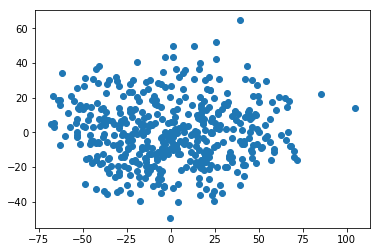

In [122]:
import matplotlib  
import matplotlib.pyplot as plt 

plt.figure()

plt.scatter(new_value[:,0],new_value[:,1])
plt.show()

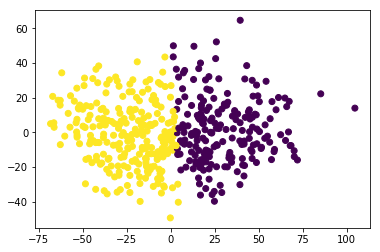

In [128]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=0).fit(new_value)
labels = kmeans.labels_

plt.figure()
plt.scatter(new_value[:,0],new_value[:,1], c=labels)
plt.show()


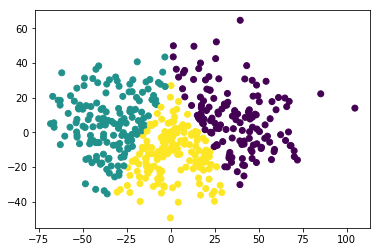

In [129]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(new_value)
labels = kmeans.labels_

plt.figure()
plt.scatter(new_value[:,0],new_value[:,1], c=labels)
plt.show()


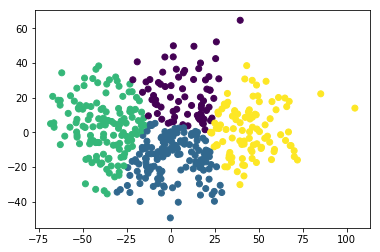

In [130]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(new_value)
labels = kmeans.labels_

plt.figure()
plt.scatter(new_value[:,0],new_value[:,1], c=labels)
plt.show()


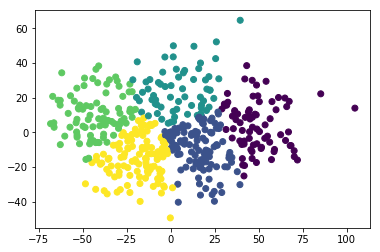

In [131]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(new_value)
labels = kmeans.labels_

plt.figure()
plt.scatter(new_value[:,0],new_value[:,1], c=labels)
plt.show()
